# Submission
* Lab: 05


* **Name**: Taimoor Arshad
* **CMS**: 294035
* **Class**: BESE-10B


I am sorry couldn't include screenshots for offline checking this time due to less time

##Task 1

Task 1.1.1.2,1.3 are done in the word document attached with this submission.

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data_set=pd.read_csv("/content/Task1.csv",sep=';')

data_set.head()

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [91]:
data_features = data_set.columns.tolist()
data_features

['weather', 'temperature', 'play']

In [92]:

from sklearn.preprocessing import OrdinalEncoder
# Using the encoder
data_encoder = OrdinalEncoder()
data_encoded = data_encoder.fit_transform(data_set [data_features])
dataframe_encoded = pd.DataFrame(data_encoded, columns= data_features)
dataframe_encoded

,weather,temperature,play
0,2.0,1.0,0.0
1,2.0,1.0,0.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,1.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,2.0,2.0,0.0
8,2.0,0.0,1.0
9,1.0,2.0,1.0


In [84]:
y = dataframe_encoded.play
x = dataframe_encoded.drop('play',axis=1)
x, y

(    weather  temperature
 0       2.0          1.0
 1       2.0          1.0
 2       0.0          1.0
 3       1.0          2.0
 4       1.0          0.0
 5       1.0          0.0
 6       0.0          0.0
 7       2.0          2.0
 8       2.0          0.0
 9       1.0          2.0
 10      2.0          2.0
 11      0.0          2.0
 12      0.0          1.0
 13      1.0          2.0, 0     0.0
 1     0.0
 2     1.0
 3     1.0
 4     1.0
 5     0.0
 6     1.0
 7     0.0
 8     1.0
 9     1.0
 10    1.0
 11    1.0
 12    1.0
 13    0.0
 Name: play, dtype: float64)

In [90]:
from sklearn.naive_bayes import CategoricalNB

#Creating a classifier
# Alpha  = 0
model = CategoricalNB(alpha=0)

# Fitting the model on the data 
model.fit(x.values,y)

#Predict Output
predicted_value= model.predict_proba([[2,1]]) # 2:Sunny, 1:Hot
predicted_value

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


array([[0.72972973, 0.27027027]])

In [89]:
#Creating a classifier
# Alpha = 1
model = CategoricalNB(alpha=1)

# Fitting the model on the data 
model.fit(x.values,y)

#Predict Output
predicted_value= model.predict_proba([[2,1]]) # 2:Sunny, 1:Hot
predicted_value

array([[0.625, 0.375]])

## Task 2

In [46]:
# Importing required stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder


In [29]:
df = pd.read_csv('/content/14_monks-problems-1.csv', ";")
#Splitting on the basis of ";"

# Assigining values to input and output labels 
X = df.drop(columns = 'label')
y = df['label']
enc = OrdinalEncoder()
enc.fit(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
# Required arrays are declared
score = []
alpha = []
for a in range (51):
  alpha.append(a)
  # model created and fitted on data
  clf = CategoricalNB(alpha = a)
  clf.fit(enc.transform(X_train), y_train)  
  y_pred = clf.predict(enc.transform(X_test))
  # Score appended to array
  score.append(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


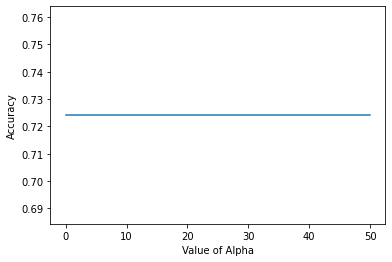

In [75]:
# Plotting Graph
plt.xlabel("Value of Alpha")
plt.ylabel("Accuracy")
plt.plot(score, label="Accuracy")

## Task 3

In [62]:
# Importing data and libraries

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
data = load_breast_cancer()

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)




0.7241379310344828

In [77]:
# Declaring arrays 

test_error = []
train_error = []
values = [1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,1e-05,1e-04,1e-03,1e-02,1e-01]
for a in values:  
  # Creating and fitting the model
  clf = GaussianNB(var_smoothing=a)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  # appending errors to designated arrays
  test_error.append(1 - clf.score(X_test, y_test))
  train_error.append(1 - clf.score(X_train, y_train))
  

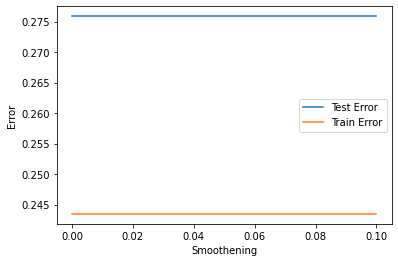

In [78]:
# Plotting the graph
plt.xlabel("Smoothening")
plt.ylabel("Error")
# Test and train errors are plotted
plt.plot(values, test_error, label="Test Error")
plt.plot(values, train_error, label = "Train Error")
plt.legend()